># <center> NEWS ARTICLES | TEXT CLASSIFICATION
_**Code by : KRISH GOYAL**_ <br>
_Email_id : goyal.krish0522@gmail.com_

Metrics before boosting:

Accuracy: 0.78


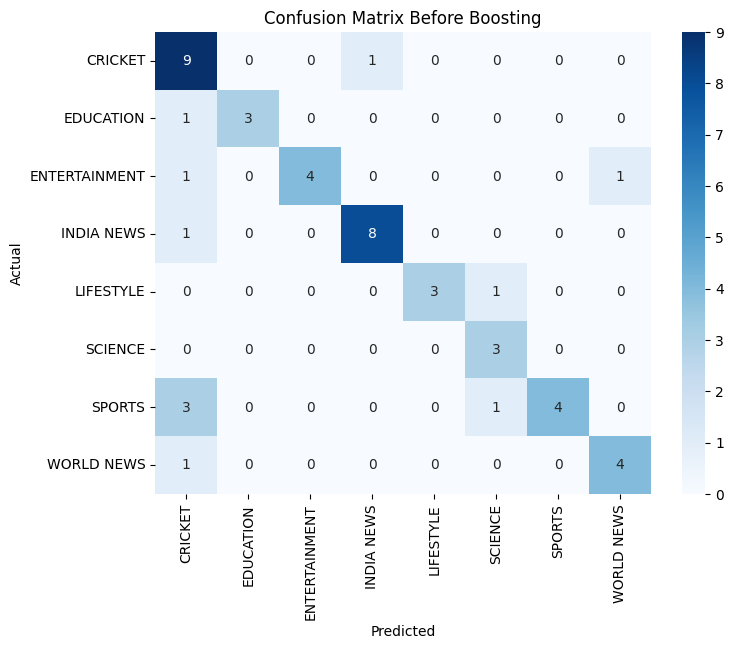

Confusion Matrix plot before boosting saved to 'confusion_matrix_before_boosting.png'.


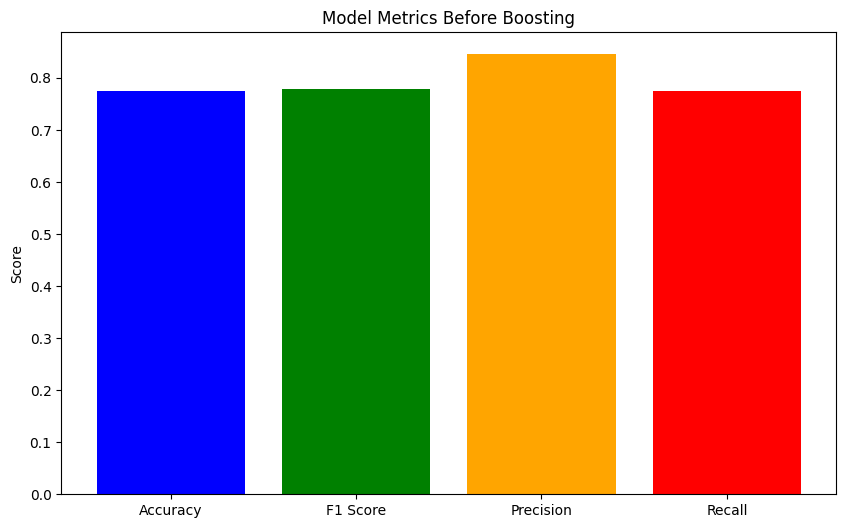

Metrics plot before boosting saved to 'model_metrics_before_boosting.png'.
Evaluation results before boosting saved to 'evaluation_results_before_boosting.csv'.

Metrics after boosting:
Accuracy: 0.82


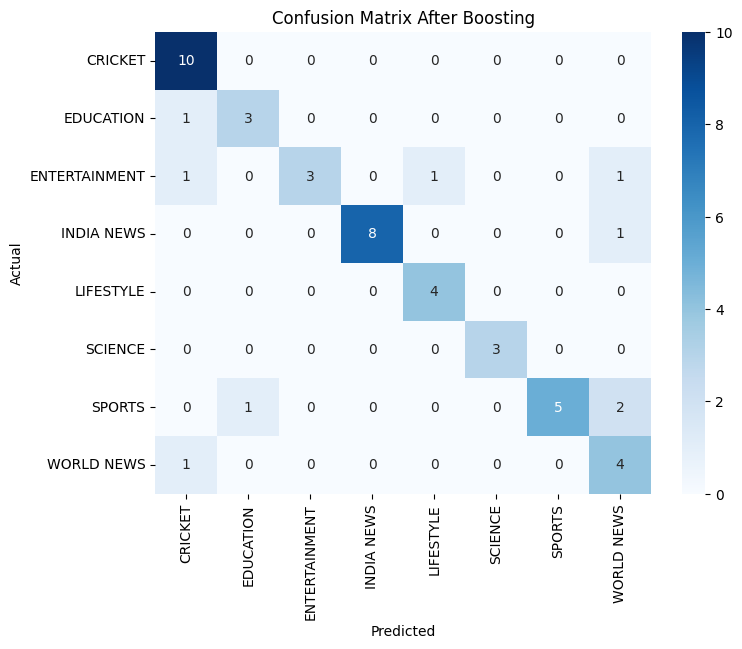

Confusion Matrix plot after boosting saved to 'confusion_matrix_after_boosting.png'.


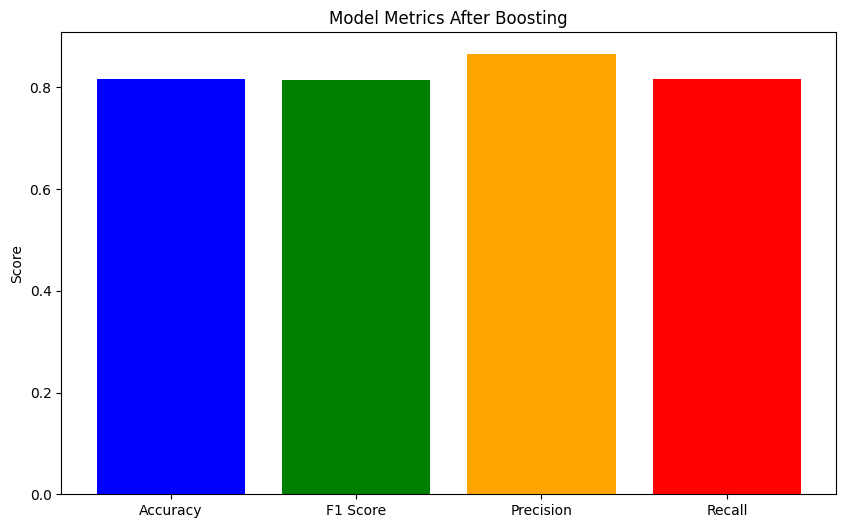

Metrics plot after boosting saved to 'model_metrics_after_boosting.png'.
Evaluation results after boosting saved to 'evaluation_results_after_boosting.csv'.


In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def classify_articles(df):
    # Split the data into training and testing sets
    train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
    
    # Vectorize the text data
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(train_data['Article_Text'])
    X_test = vectorizer.transform(test_data['Article_Text'])
    
    # Define the RandomForest classifier
    classifier = RandomForestClassifier(random_state=42)
    
    # Define the parameter grid for grid search
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    # Perform grid search
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, train_data['Category'])
    
    # Get the best parameters
    best_params = grid_search.best_params_
    
    # Train the classifier with the best parameters
    classifier = RandomForestClassifier(random_state=42, **best_params)
    classifier.fit(X_train, train_data['Category'])

    # Predict the categories for the test set before boosting
    y_pred = classifier.predict(X_test)
    
    # Calculate metrics before boosting
    accuracy_before_boosting = accuracy_score(test_data['Category'], y_pred)
    
    # Print metrics before boosting
    print("Metrics before boosting:")
    print(f"\nAccuracy: {accuracy_before_boosting:.2f}")

    # Plot Confusion Matrix before boosting
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(test_data['Category'], y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
    plt.title('Confusion Matrix Before Boosting')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig('confusion_matrix_before_boosting.png')
    plt.show()
    print("Confusion Matrix plot before boosting saved to 'confusion_matrix_before_boosting.png'.")
    
    # Plot other metrics before boosting
    plt.figure(figsize=(10, 6))
    metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
    values = [accuracy_before_boosting, f1_score(test_data['Category'], y_pred, average='weighted'), precision_score(test_data['Category'], y_pred, average='weighted'), recall_score(test_data['Category'], y_pred, average='weighted')]
    plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
    plt.title('Model Metrics Before Boosting')
    plt.ylabel('Score')
    plt.savefig('model_metrics_before_boosting.png')
    plt.show()
    print("Metrics plot before boosting saved to 'model_metrics_before_boosting.png'.")
    
    # Save the evaluation results to a CSV file before boosting
    evaluation_results = pd.DataFrame({'Actual': test_data['Category'], 'Predicted': y_pred})
    evaluation_results.to_csv('evaluation_results_before_boosting.csv', index=False)
    print("Evaluation results before boosting saved to 'evaluation_results_before_boosting.csv'.")
    
    # Boosting (you can try other boosting algorithms like AdaBoost or Gradient Boosting)
    # For simplicity, I'm using the same RandomForest classifier with more trees
    classifier_boosted = RandomForestClassifier(n_estimators=200, random_state=42)
    classifier_boosted.fit(X_train, train_data['Category'])
    
    # Predict the categories for the test set after boosting
    y_pred_boosted = classifier_boosted.predict(X_test)
    
    # Calculate metrics after boosting
    accuracy_after_boosting = accuracy_score(test_data['Category'], y_pred_boosted)
    
    # Print metrics after boosting
    print("\nMetrics after boosting:")
    print(f"Accuracy: {accuracy_after_boosting:.2f}")

    # Plot Confusion Matrix after boosting
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(test_data['Category'], y_pred_boosted), annot=True, fmt='d', cmap='Blues', xticklabels=classifier_boosted.classes_, yticklabels=classifier_boosted.classes_)
    plt.title('Confusion Matrix After Boosting')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig('confusion_matrix_after_boosting.png')
    plt.show()
    print("Confusion Matrix plot after boosting saved to 'confusion_matrix_after_boosting.png'.")
    
    # Plot other metrics after boosting
    plt.figure(figsize=(10, 6))
    metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
    values = [accuracy_after_boosting, f1_score(test_data['Category'], y_pred_boosted, average='weighted'), precision_score(test_data['Category'], y_pred_boosted, average='weighted'), recall_score(test_data['Category'], y_pred_boosted, average='weighted')]
    plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
    plt.title('Model Metrics After Boosting')
    plt.ylabel('Score')
    plt.savefig('model_metrics_after_boosting.png')
    plt.show()
    print("Metrics plot after boosting saved to 'model_metrics_after_boosting.png'.")
    
    # Save the evaluation results to a CSV file after boosting
    evaluation_results_after_boosting = pd.DataFrame({'Actual': test_data['Category'], 'Predicted': y_pred_boosted})
    evaluation_results_after_boosting.to_csv('evaluation_results_after_boosting.csv', index=False)
    print("Evaluation results after boosting saved to 'evaluation_results_after_boosting.csv'.")

# Assuming 'df' is your DataFrame containing 'Article_Text' and 'Category' columns
classify_articles(df)